In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

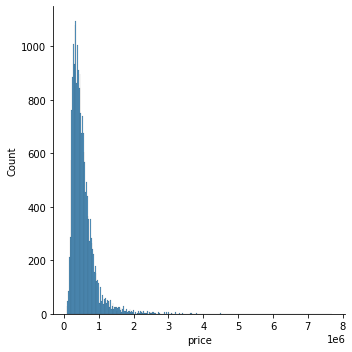

In [6]:
sns.displot(df['price'])

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='long', ylabel='lat'>

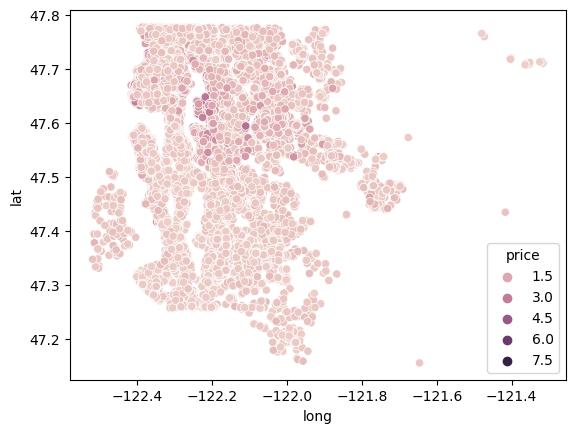

In [8]:
sns.scatterplot(x='long',y='lat',data=df, hue='price')

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [11]:
X = df.drop(['id','date','lat','long','zipcode'], axis=1)
y= df['price']

In [12]:
print(X.shape)
print(y.shape)

(21597, 18)
(21597,)


In [13]:
# pre-processing part

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(15117, 18)
(6480, 18)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-05-24 17:25:54.481844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:25:54.481885: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [17]:
model = Sequential()
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

2022-05-24 17:26:04.117074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-24 17:26:04.117130: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-24 17:26:04.117161: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-5a04ff): /proc/driver/nvidia/version does not exist
2022-05-24 17:26:04.118074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer='adam', loss='mse')

In [19]:
model.fit(X_train, y_train, batch_size=128, epochs=500, verbose=1, validation_data=(X_test, y_test))

Epoch 1/500
119/119 [==============================] - 2s 3ms/step - loss: 429749796864.0000 - val_loss: 420120788992.0000
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 429508132864.0000 - val_loss: 419424174080.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 427398725632.0000 - val_loss: 415255068672.0000
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 419143254016.0000 - val_loss: 402482626560.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 398975074304.0000 - val_loss: 375530389504.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 361727098880.0000 - val_loss: 330678140928.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 307985219584.0000 - val_loss: 274883903488.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 246471557120.0000 - val_loss: 213697658880.0000
Epoch 9/500
119/

In [20]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

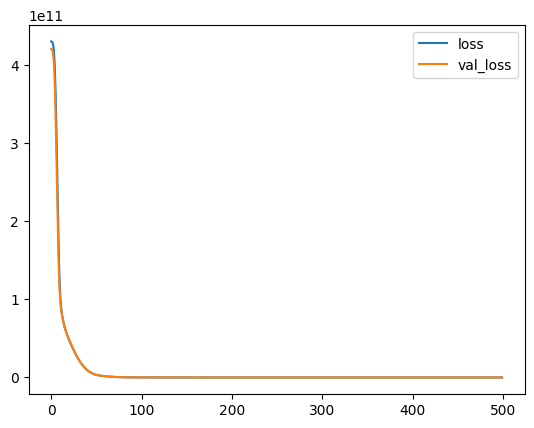

In [21]:
loss_df.plot()

In [22]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.999987694115177
